<a href="https://colab.research.google.com/github/plee0617/IS-170-Binder/blob/Text-mining-%26-Natural-language-processing-(NLP)/Lee_IS170_MW_TextMining%26WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NLP book by Samuel Burns**

In [ ]:
# Pang Yia Lee

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import sent_tokenize
myString="This is a paragraph. It should split at the end of sentence marker, such as a period. It can tell that the period in Mr. John is not an end. Run it!"

tokenized_sentence = sent_tokenize(myString)
print(tokenized_sentence)


['This is a paragraph.', 'It should split at the end of sentence marker, such as a period.', 'It can tell that the period in Mr. John is not an end.', 'Run it!']


In [ ]:
from nltk.tokenize import sent_tokenize
myString="These are sentences. Let us tokenize it! Run it!"
print(myString.split())


['These', 'are', 'sentences.', 'Let', 'us', 'tokenize', 'it!', 'Run', 'it!']


In [ ]:
from nltk.tokenize import word_tokenize, regexp_tokenize
myString="These are 3 sentences. Let us tokenize it for 5 more days! Run it!"
print(word_tokenize(myString))
print(regexp_tokenize(myString, pattern="\w+"))
print(regexp_tokenize(myString, pattern="\d+"))


['These', 'are', '3', 'sentences', '.', 'Let', 'us', 'tokenize', 'it', 'for', '5', 'more', 'days', '!', 'Run', 'it', '!']
['These', 'are', '3', 'sentences', 'Let', 'us', 'tokenize', 'it', 'for', '5', 'more', 'days', 'Run', 'it']
['3', '5']


In [ ]:
from nltk.stem import PorterStemmer
porter=PorterStemmer()
print(porter.stem("cutting"))


cut


In [ ]:
from nltk.stem import LancasterStemmer
lancaster=LancasterStemmer()
print(lancaster.stem("sleeping"))


sleep


In [ ]:
from nltk.stem.snowball import SnowballStemmer
snowball=SnowballStemmer("english")
print(snowball.stem("driving"))


drive


In [ ]:
import nltk
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemma=WordNetLemmatizer()
print(lemma.lemmatize("feet"))
print(lemma.lemmatize("bats"))
print(lemma.lemmatize("knives"))
print(lemma.lemmatize("halves"))
print(lemma.lemmatize("syllabi"))


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


foot
bat
knife
half
syllabus


In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
mylist=stopwords.words('english')
paragraph="We have created a long paragraph of text. You may have important words like Deep Learning and Apple.Words that are not important may be removed."
postPa=[word for word in paragraph.split() if word not in mylist]
print(postPa)


['We', 'created', 'long', 'paragraph', 'text.', 'You', 'may', 'important', 'words', 'like', 'Deep', 'Learning', 'Apple.Words', 'important', 'may', 'removed.']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
myString = "The 5 countries includes Canada, France, England, Brazil and the U.S."
str=myString.lower()
print(str)


the 5 countries includes canada, france, england, brazil and the u.s.


In [ ]:
myString = "The 5 countries includes Canada, France, England, Brazil and the U.S."
str=myString.upper()
print(str)

THE 5 COUNTRIES INCLUDES CANADA, FRANCE, ENGLAND, BRAZIL AND THE U.S.


In [ ]:
import re
myString = 'Box A has 4 red and 6 white balls, while Box B has 3 red and 5 blue balls.'
output = re.sub(r'\d+', " ", myString)
print(output)


Box A has   red and   white balls, while Box B has   red and   blue balls.


In [ ]:
import string
myString = "This &is [a] string? {with} many.punctuation.? marks!!!!"
output = myString.translate(str.maketrans("","", string.punctuation))
print(output)


This is a string with manypunctuation marks


In [ ]:
import string
myString = "\t a sample string\t"
str=myString.strip()
print(str)


a sample string


# We'll skip the "Part of Speech Tagging" and "Named entity recognition"

In [ ]:
import nltk.corpus
nltk.download('wordnet')
syn=wordnet.synsets("quick")
print(syn)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


NameError: ignored

In [ ]:
from nltk.corpus import wordnet
synonyms = []
antonyms = []
for s in wordnet.synsets("passive"):
  for lemm in s.lemmas():
    synonyms.append(lemm.name())
    if lemm.antonyms():
      antonyms.append(lemm.antonyms()[0].name())

      print(set(synonyms))
      print(set(antonyms))

      

{'passive_voice'}
{'active_voice'}
{'passive', 'passive_voice'}
{'active', 'active_voice'}
{'inactive', 'passive', 'passive_voice', 'peaceful'}
{'active', 'active_voice'}


Fixing Word Lengthening and Spell Correction requires additional library (pattern library) to be installed in order to run these topics. 

In [ ]:
import re
def reduce_lengthening(text):
  pattern=re.compiler(r"(.)\1{2,}")
  return pattern.sub(r"\1\1",text)
print reduce_lengthening("finalllllllly")











SyntaxError: ignored

In [ ]:

from pattern.en import spelling

word="amazzzzziiiiiing"
word_wlf=reduce_lengthening(word) 
print (word_wlf) 

correct_word=spelling(word_wlf)
print (correct_word)





ModuleNotFoundError: ignored

# Text Classification

In [ ]:
import nltk
import random
from nltk.corpus import movie_reviews

nltk.download('movie_reviews')
docs=[(list(movie_reviews.words(fileid)), category)
      for category in movie_reviews.categories()
      for fileid in movie_reviews.fileids(category)]

random.shuffle(docs)

print(docs[1])

all=[]
for w in movie_reviews.words():
  all.append(w.lower())

all=nltk.FreqDist(all)
print(all.most_common(15))
print(all["entertainment"])


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


(['did', 'i', 'do', 'something', 'bad', '?', 'i', 'must', 'have', ',', 'because', 'sitting', 'through', 'this', 'movie', 'was', 'sheer', 'punishment', '.', 'here', "'", 's', 'the', 'plot', '.', 'ricky', '(', 'jeff', 'goldblum', ')', 'is', 'producer', 'of', 'the', 'good', '-', 'buy', 'network', ',', 'one', 'of', 'those', '24', '-', 'hour', 'home', 'shopping', 'channels', '.', 'the', 'new', 'boss', '(', 'robert', 'loggia', ')', 'plans', 'to', 'can', 'ricky', "'", 's', 'behind', 'if', 'he', 'doesn', "'", 't', 'turn', 'the', 'previous', 'months', "'", 'flat', 'sales', 'numbers', 'around', ',', 'and', 'to', 'add', 'to', 'his', 'problems', ',', 'ricky', 'also', 'has', 'to', 'work', 'with', 'kate', '(', 'kelly', 'preston', ')', ',', 'the', 'ivy', 'league', 'wunderkind', 'whom', 'the', 'boss', 'has', 'brought', 'with', 'him', '.', 'kate', 'and', 'ricky', 'don', "'", 't', 'get', 'along', 'and', 'don', "'", 't', 'have', 'any', 'great', 'ideas', 'until', 'they', 'meet', 'g', '(', 'eddie', 'murphy

In [ ]:
import nltk
import random
from nltk.corpus import movie_reviews

nltk.download('movie_reviews')
docs = [(list(movie_reviews.words(fileid)),category)
  for category in movie_reviews.categories()
  for fileid in movie_reviews.fileids(category)]

random.shuffle(docs)

print(docs[1])

all=[]
for w in movie_reviews.words():
  all.append(w.lower())

all=nltk.FreqDist(all)
word_features=list(all.keys())[:3000]


##Notice that we have introduced a new variable with the name word_features. 
##This variable will hold the most popular 3000 words. 
##We now need to create a function that will help us find these words from 
##both the positive and negative documents, with their presence being marked as either 
##positive or negative. Here is the function:


def search_features(doc):
  words=set(doc)
  features={}
  for w in word_features:
    features[w]=(w in words)

  return features

print(search_features(movie_reviews.words('neg/cv000_29416.txt')))


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


(['a', 'common', 'complaint', 'amongst', 'film', 'critics', 'is', '"', 'why', 'aren', "'", 't', 'there', 'more', 'literate', 'scripts', 'available', '?', '"', 'quiz', 'show', 'gives', 'signs', 'of', 'hope', 'that', 'the', 'art', 'of', 'writing', 'isn', "'", 't', 'dead', 'in', 'hollywood', 'and', 'that', 'we', 'need', 'not', 'only', 'look', 'to', 'independent', 'films', 'for', 'thoughtful', 'content', '.', 'paul', 'attanasio', "'", 's', 'script', 'takes', 'what', 'could', 'have', 'been', 'a', 'tepid', 'thriller', '(', 'the', 'quiz', 'show', 'scandals', 'of', 'the', 'late', '50s', ')', 'and', 'delivers', 'a', 'telling', 'parable', 'about', 'the', 'emptiness', 'of', 'the', 'post', 'war', 'american', 'dream', 'and', 'the', 'golden', 'bubble', 'that', 'surrounds', 'and', 'protects', 'tv', 'networks', 'and', 'their', 'sponsors', '.', 'the', 'film', 'is', 'riddled', 'with', 'telling', 'symbols', '(', 'e', '.', 'g', '.', 'a', "'", '58', 'chrysler', ',', 'a', 'radio', 'announcement', 'of', 'spu

# Naive Bayes Classifier

In [ ]:
import nltk
import random
from nltk.corpus import movie_reviews

nltk.download('movie_reviews')
docs = [(list(movie_reviews.words(fileid)),category)
  for category in movie_reviews.categories()
  for fileid in movie_reviews.fileids(category)]

random.shuffle(docs)

print(docs[1])

all=[]
for w in movie_reviews.words():
  all.append(w.lower())

all=nltk.FreqDist(all)
word_features=list(all.keys())[:3000]

def search_features(doc):
  words=set(doc)
  features={}
  for w in word_features:
    features[w]=(w in words)

  return word_features

testing_set=featuresets[1900:]

classifier=nltk.NaiveBayesClassifier.train(training_set)

print("Classifier accuracy percentage:",(nltk.classify.accuracy(classifier,testing_set))*100)

classifier.show_most_informative_features(10)


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


(['"', 'an', 'intimate', ',', 'character', '-', 'driven', 'drama', 'about', 'a', 'troubled', 'youth', 'at', 'a', 'crossroads', 'in', 'his', 'life', ',', '"', 'read', 'the', 'press', 'notes', 'for', '_reach_the_rock_', '.', 'i', "'", 'm', 'not', 'really', 'sure', 'what', 'film', 'that', 'statement', 'is', 'describing', 'because', 'those', 'words', 'bear', 'little', 'resemblance', 'to', 'the', 'slow', ',', 'completely', 'uninvolving', 'bore', 'i', 'saw', '--', 'at', 'least', ',', 'it', 'certainly', 'does', 'not', 'describe', 'what', 'goes', 'on', 'for', 'most', 'of', 'the', 'film', '.', 'alessandro', 'nivola', 'plays', 'robin', 'fleming', ',', 'a', 'troubled', ',', 'directionless', '21', '-', 'year', '-', 'old', 'who', 'has', 'a', 'penchant', 'for', 'breaking', 'storefront', 'windows', 'in', 'a', 'small', 'town', '.', 'police', 'sergeant', 'phil', 'quinn', '(', 'william', 'sadler', ')', 'takes', 'him', 'in', ',', 'and', 'what', 'ensues', 'for', 'the', 'first', '70', 'minutes', 'is', 'a',

NameError: ignored

# Sentiment Analysis

In [ ]:
!pip install Textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 10.2 MB/s eta 0:00:00


In [ ]:
 from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 analyser=SentimentIntensityAnalyzer()
 

In [ ]:
def sentiment_analyzer_scores(sentence):
  score=analyser.polarity_scores(sentence)
  print("{:-<40}{}".format(sentence,str(score)))

print(sentiment_analyzer_scores("The car is cool!"))


TypeError: ignored

In [ ]:
print(sentiment_analyzer_scores("The car is cool"))
print(sentiment_analyzer_scores("The car is cool!"))
print(sentiment_analyzer_scores("The car is cool!!"))
print(sentiment_analyzer_scores("The car is cool!!!"))

TypeError: ignored

In [ ]:
print(sentiment_analyzer_scores("The car is cool!"))
print(sentiment_analyzer_scores("The car is marginally cool!"))
print(sentiment_analyzer_scores("The car is extremely cool!"))

TypeError: ignored

In [ ]:
 from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 analyser=SentimentIntensityAnalyzer()

 def sentiment_analyzer_scores(sentence):
  score=analyser.polarity_scores(sentence)
  print("{:-<40}{}".format(sentence,str(score)))

print(sentiment_analyzer_scores("I enjoyed your hotel food, but I didn't like the way waiters offer their services"))


TypeError: ignored

# Chatbot

In [ ]:
!pip install chatterbot
!pip install chatterbot_corpus


In [ ]:
!pip install --upgrade chatterbot_corpus
!pip install --upgrade chatterbot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.6/270.6 KB 23.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for PyYAML: filename=PyYAML-3.13-cp38-cp38-linux_x86_64.whl size=43098 sha256=2bdaa09318091d7eff92e0e6142b6a49889bad39a9ee5ffb9db42ac1a33b1433
  Stored in directory: /root/.cache/pip/wheels/db/f2/07/5e58b12bc11255c3fc0a0aca89849050a8ec203d8b4a3c52c0
Successfully built PyYAML
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.2.1 requires pyyaml>=5.3.1, but you have pyyaml 3.13 which is incompatible.

In [ ]:
from chatterbot import ChatBot
from chatterbot.trainers import ListTrainer


ModuleNotFoundError: ignored

In [ ]:
my_bot=ChatBot(name='PyBot', read_only=True, logic_adapters=['chatterbot.logic.MathematicalEvaluation', 'chatterbot.logic.BestMatch'])


In [ ]:
small_talk=['hi there!',
            'hi!',
            'how do you do?',
            'how are you?',
            'i\'m cool.',
            'fine, you?',
            'always cool.',
            'i\'m ok',
            'glad to hear that.',
            'i\'m fine',
            'glad to hear that.',
            'i feel awesome',
            'excellent, glad to hear that.',
            'not so good',
            'sorry to hear that.',
            'what\'s your name?',
            'i\'m pybot. ask me a math question, please.']

math_talk_2=['law of cosines',
             'c**2 = a**2 + b**2-2*a*b*cos(gamma)']


In [ ]:
list_trainer=ListTrainer(my_bot)

for item in (small_talk, math_talk_2):
    list_trainer.train(item)


In [ ]:
print(my_bot.get_response("hi"))


In [ ]:
print(my_bot.get_response("i feel awesome today"))

In [ ]:
print(my_bot.get_response("what's your name?"))

In [ ]:
print(my_bot.get_response("do you know the law of cosines?"))

In [ ]:
print(my_bot.get_response("always cool."))

In [ ]:
from chatterbot.trainers import ChatterBotCorpusTrainer

corpus_trainer=ChatterBotCorpusTrainer(my_bot)
corpus_trainer.train('chatterbot.corpus.english')

# WordCloud

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from io import IncrementalNewlineDecoder
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Load in the dataframe
df=pd.read_csv("Lottery_Mega_Millions_Winning_Numbers__Beginning_2002.csv")

In [ ]:
df.head()

,Draw Date,Winning Numbers,Mega Ball,Multiplier
0,09/25/2020,20 36 37 48 67,16,2.0
1,09/29/2020,14 39 43 44 67,19,3.0
2,10/02/2020,09 38 47 49 68,25,2.0
3,10/06/2020,15 16 18 39 59,17,3.0
4,10/09/2020,05 11 25 27 64,13,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Draw Date        2160 non-null   object 
 1   Winning Numbers  2160 non-null   object 
 2   Mega Ball        2160 non-null   int64  
 3   Multiplier       1257 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 67.6+ KB


In [ ]:
df[["Draw Date", "Winning Numbers", "Mega Ball"]].head()

,Draw Date,Winning Numbers,Mega Ball
0,09/25/2020,20 36 37 48 67,16
1,09/29/2020,14 39 43 44 67,19
2,10/02/2020,09 38 47 49 68,25
3,10/06/2020,15 16 18 39 59,17
4,10/09/2020,05 11 25 27 64,13


In [ ]:
country=df.groupby("Draw Date")

In [ ]:
country.describe().head()

Mega Ball                                         Multiplier       \
               count  mean std   min   25%   50%   75%   max      count mean   
Draw Date                                                                      
01/01/2008       1.0  11.0 NaN  11.0  11.0  11.0  11.0  11.0        0.0  NaN   
01/01/2010       1.0  21.0 NaN  21.0  21.0  21.0  21.0  21.0        0.0  NaN   
01/01/2013       1.0  29.0 NaN  29.0  29.0  29.0  29.0  29.0        1.0  4.0   
01/01/2016       1.0   9.0 NaN   9.0   9.0   9.0   9.0   9.0        1.0  5.0   
01/01/2019       1.0  14.0 NaN  14.0  14.0  14.0  14.0  14.0        1.0  4.0   

                                         
           std  min  25%  50%  75%  max  
Draw Date                                
01/01/2008 NaN  NaN  NaN  NaN  NaN  NaN  
01/01/2010 NaN  NaN  NaN  NaN  NaN  NaN  
01/01/2013 NaN  4.0  4.0  4.0  4.0  4.0  
01/01/2016 NaN  5.0  5.0  5.0  5.0  5.0  
01/01/2019 NaN  4.0  4.0  4.0  4.0  4.0

In [ ]:
country.mean().sort_values(by="Draw Date",ascending=False).head()

,Mega Ball,Multiplier
Draw Date,,
12/31/2021,8.0,3.0
12/31/2019,11.0,3.0
12/31/2013,8.0,3.0
12/31/2010,9.0,NaN
12/31/2004,20.0,NaN


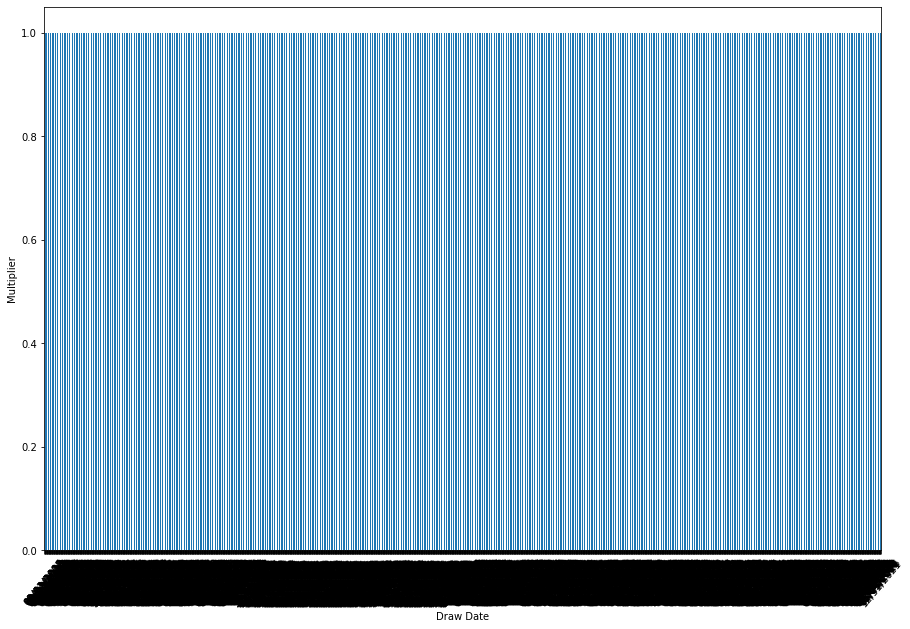

In [ ]:
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Draw Date")
plt.ylabel("Multiplier")
plt.show()


In [ ]:
#start with one review:
text=df.description[0]

#create and generate a word cloud image:
wordcloud=WordCloud().generate(text)

#Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


AttributeError: ignored

In [ ]:
#lower max_font_size, change the maximum number of word and light the background:

wordcloud=WordCloud(max_font_size=50,max_words=100,background_color="white").generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


NameError: ignored

In [ ]:
text=" ".join(review for review in df.description)
print("There are {} words in teh combination of all reviews.". format(len(text)))


AttributeError: ignored

In [ ]:
#Create stopword list:
stopwords=set(STOPWORDS)
stopwords.update(["drink","now", "wine", "flavor", "flavors"])

#Generate a word cloud image
wordcloud=WordCloud(stopwords=stopwords,background_color="white").generate(text)

#Display the generated image:
#the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


NameError: ignored

In [ ]:
lottery_=np.array(Image.open("lottery.jpg"))
lottery_

array([[[221, 165,  78],
        [221, 165,  78],
        [221, 165,  78],
        ...,
        [185, 130,  73],
        [187, 132,  75],
        [194, 139,  82]],

       [[221, 165,  78],
        [221, 165,  78],
        [221, 165,  78],
        ...,
        [184, 129,  72],
        [187, 132,  75],
        [194, 139,  82]],

       [[222, 166,  79],
        [222, 166,  79],
        [222, 166,  79],
        ...,
        [184, 129,  72],
        [187, 132,  75],
        [194, 139,  82]],

       ...,

       [[209, 152,  81],
        [209, 152,  81],
        [209, 152,  81],
        ...,
        [198, 100, 113],
        [196, 104, 115],
        [197, 110, 119]],

       [[212, 155,  84],
        [212, 155,  84],
        [212, 155,  84],
        ...,
        [200, 108, 119],
        [197, 114, 122],
        [200, 121, 127]],

       [[214, 157,  86],
        [214, 157,  86],
        [214, 157,  86],
        ...,
        [205, 118, 127],
        [204, 125, 131],
        [207, 132, 137]]

In [ ]:
def transform_format(val):
  if val==0:
    return 255
  else:
      return val

In [ ]:
#Transform your mask into a new one that will work with the function:
transformed_lottery_=np.ndarray((lottery_.shape[0],lottery_.shape[1]),np.int32)

for i in range(len(lottery_)):
  transformed_lottery_[i]=list(map(transform_format,lottery_[i]))
  

ValueError: ignored

In [ ]:
#Check the expected result of your mask
transformed_lottery_

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [ ]:
#Create a word cloud image
wc=WordCloud(background_color="white", max_words=1000, mask=transformed_lottery_,stopwords=stopwords,contour_width=3,contour_color='firebrick')

#Generate a wordcloud
wc.generate(text)

#store to file
wc.to_file("lottery.jpeg")

#show
plt.figure(figsize=[20,10])
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()


NameError: ignored

# SciKit-Learn for Text Classification

In [ ]:
from sklearn.datasets import fetch_20newsgroups
news=fetch_20newsgroups(subset='all')

print(len(news.data))
#18846

print(len(news.target_names))
#20

print(news.target_names)
# ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

for text, num_label in zip(news.data[:10],news.target[:10]):
  print('[%s]:\t\t"%s..."'%(news.target_names[num_label],text[:100].split('\n')[0]))


18846
20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
[rec.sport.hockey]:		"From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>..."
[comp.sys.ibm.pc.hardware]:		"From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)..."
[talk.politics.mideast]:		"From: hilmi-er@dsv.su.se (Hilmi Eren)..."
[comp.sys.ibm.pc.hardware]:		"From: guyd@austin.ibm.com (Guy Dawson)..."
[comp.sys.mac.hardware]:		"From: Alexander Samuel McDiarmid <am2o+@andrew.cmu.edu>..."
[sci.electronics]:		"From: tell@cs.unc.edu (Stephen Tell)..."
[comp.sys.mac.hardware]:		"From: lpa8921@tamuts.tamu.edu (Louis Paul Adams)..."
[rec.sport.hockey]:		"From: dchhabra@stpl.ists.ca (Deepak

In [ ]:
from sklearn.model_selection import train_test_split

def train(classifier, X,y):
  X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=33)
  classifier.fit(X_train, y_train)
  print("Accuracy:%s"%classifier.score(X_test,y_test))
  return classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

trial1=Pipeline([('vectorizer',TfidfVectorizer()),
                 ('classifier', MultinomialNB()),
])

train(trial1,news.data,news.target)


Accuracy:0.8463497453310697


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
trial2=Pipeline([
                 ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))),
                 ('classifier', MultinomialNB()),              
                 ])
train(trial2,news.data,news.target)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy:0.8777589134125636


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('classifier', MultinomialNB())])

In [ ]:
trial3=Pipeline([
                 ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))),
                 ('classifier', MultinomialNB(alpha=0.05)),
                 ])

train(trial3,news.data,news.target)


Accuracy:0.9102292020373515


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('classifier', MultinomialNB(alpha=0.05))])

In [ ]:
trial4=Pipeline([
                ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'),
                                               min_df=5)),
                ('classifier', MultinomialNB(alpha=0.05)),                               
                ])
train(trial4,news.data,news.target)


Accuracy:0.9028013582342954


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(min_df=5,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('classifier', MultinomialNB(alpha=0.05))])